# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernible landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import torch
import numpy as np
from torchvision import datasets, transforms, models
import PIL
import matplotlib.pyplot as plt
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import torch.nn.functional as F

In [2]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
#traindata_path = 'C:\\Users\\sushe\\nd101-c2-landmarks-starter\\landmark_project\\images\\train\\00.Haleakala_National_Park\\'
#traindata_path ='C:\\Users\\sushe\\nd101-c2-landmarks-starter\\landmark_project\\images\\test'
traindata_path = 'C:\\Users\\sushe\\Downloads\\landmark_images\\train'
train_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(256),
                                     transforms.ToTensor()])
train_data = datasets.ImageFolder(traindata_path, transform = train_transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size = 100, num_workers=0)





In [3]:
testdata_path = 'C:\\Users\\sushe\\Downloads\\landmark_images\\test'
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(256),
                                     transforms.ToTensor()])
test_data = datasets.ImageFolder(testdata_path, transform = test_transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 100, num_workers=0)

In [4]:
valid_size = 0.20
batch_size = 100
num_workers = 0
num_train = len(train_data)
indicies = list(range(num_train))
np.random.shuffle(indicies)
split = int(np.floor(valid_size * num_train))
train_index, valid_index = indicies[split:], indicies[:split]
train_sampler = torch.utils.data.SubsetRandomSampler(train_index)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_index)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler, num_workers = num_workers)

In [5]:
loaders_scratch = {'train': trainloader, 'valid': valid_loader, 'test': testloader}

**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

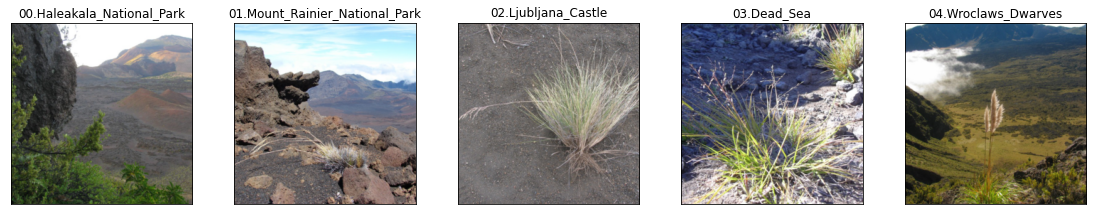

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import torch.nn.functional as F

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)
images, labels = next(iter(trainloader))
images = images.numpy()
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(400, 400))

for index in np.arange(5):
    ax = fig.add_subplot(100, 100, index+1, xticks=[], yticks=[])
    image = images[index].transpose((1,2,0))
    ax.imshow(np.squeeze(image))
    ax.set_title(train_data.classes[index])

### Initialize use_cuda variable

In [7]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()
print(use_cuda)


True


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [8]:
## TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.001)
    return optimizer

    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [9]:
import torch.nn as nn

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,32,3)
        self.conv2 = nn.Conv2d(32,64,3)
        self.conv3 = nn.Conv2d(64,128, 3)
        #self.conv4 = nn.Conv2d(256, 512,3)
        #self.conv5 = nn.Conv2d(256,256,3,padding=1)
        #self.conv6 = nn.Conv2d(256,512, 3,padding=1)
        #self.conv7 = nn.Conv2d(512,512,3,padding=1)
        #self.conv8 = nn.Conv2d(512,512,3,padding=1)
        #self.conv9 = nn.Conv2d(512,512,3,padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(128*60*60, 50)
        #self.fc2 = nn.Linear(128, 50)
        #self.fc3 = nn.Linear(64, 50)
        
        
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        #x = self.pool(x)
        #x = F.relu(self.conv4(x))
        #print(x.shape)
        #x = F.relu(self.conv5(x))
        #x = self.pool(x)
        #x = F.relu(self.conv6(x))
        #x = self.pool(x)
        #x = F.relu(self.conv7(x))
        #x = F.relu(self.conv8(x))
        #x = F.relu(self.conv9(x))
        #print(x.shape)
        x = x.view(-1, 128*60*60)
        x = self.fc1(x)
        #x = self.fc2(x)
        #x = self.fc3(x)
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

print(model_scratch)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=460800, out_features=50, bias=True)
)


__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [10]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        test_loss = 0.0
        
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion_scratch(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        
            
         

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion_scratch(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))
            ## TODO: update average validation loss 


            
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \ttestloss {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss,
            test_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        
        if(valid_loss <= valid_loss_min):
            print('Valid loss decresed ({:.6f} --> {:.6f}). Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_landmark.pt')
            valid_loss_min = valid_loss
        
        
    return model




### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [11]:
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
    if(classname.find('Linear') !=-1):
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y,y)
        m.bias.data.fill_(0)
    
    

#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
#model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
#                      criterion_scratch, use_cuda, 'ignore.pt')

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=460800, out_features=50, bias=True)
)

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [13]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 2000

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_landmark.pt')

Epoch: 1 	Training Loss: 4.076934 	Validation Loss: 3.909257 	testloss 4.076934
Valid loss decresed (inf --> 3.909257). Saving model ...
Epoch: 2 	Training Loss: 3.953184 	Validation Loss: 3.907287 	testloss 3.953184
Valid loss decresed (3.909257 --> 3.907287). Saving model ...
Epoch: 3 	Training Loss: 3.928958 	Validation Loss: 3.905761 	testloss 3.928958
Valid loss decresed (3.907287 --> 3.905761). Saving model ...
Epoch: 4 	Training Loss: 3.919360 	Validation Loss: 3.904373 	testloss 3.919360
Valid loss decresed (3.905761 --> 3.904373). Saving model ...
Epoch: 5 	Training Loss: 3.914405 	Validation Loss: 3.902970 	testloss 3.914405
Valid loss decresed (3.904373 --> 3.902970). Saving model ...
Epoch: 6 	Training Loss: 3.911285 	Validation Loss: 3.901486 	testloss 3.911285
Valid loss decresed (3.902970 --> 3.901486). Saving model ...
Epoch: 7 	Training Loss: 3.908965 	Validation Loss: 3.899855 	testloss 3.908965
Valid loss decresed (3.901486 --> 3.899855). Saving model ...
Epoch: 8 	T

Epoch: 60 	Training Loss: 3.516900 	Validation Loss: 3.637796 	testloss 3.516900
Epoch: 61 	Training Loss: 3.497085 	Validation Loss: 3.699152 	testloss 3.497085
Epoch: 62 	Training Loss: 3.479861 	Validation Loss: 3.760954 	testloss 3.479861
Epoch: 63 	Training Loss: 3.463914 	Validation Loss: 3.801877 	testloss 3.463914
Epoch: 64 	Training Loss: 3.450879 	Validation Loss: 3.792589 	testloss 3.450879
Epoch: 65 	Training Loss: 3.439226 	Validation Loss: 3.746203 	testloss 3.439226
Epoch: 66 	Training Loss: 3.426151 	Validation Loss: 3.716821 	testloss 3.426151
Epoch: 67 	Training Loss: 3.414964 	Validation Loss: 3.730266 	testloss 3.414964
Epoch: 68 	Training Loss: 3.409191 	Validation Loss: 3.770545 	testloss 3.409191
Epoch: 69 	Training Loss: 3.410849 	Validation Loss: 3.832145 	testloss 3.410849
Epoch: 70 	Training Loss: 3.425322 	Validation Loss: 3.901326 	testloss 3.425322
Epoch: 71 	Training Loss: 3.450406 	Validation Loss: 3.955868 	testloss 3.450406
Epoch: 72 	Training Loss: 3.

Epoch: 147 	Training Loss: 3.095385 	Validation Loss: 2.973063 	testloss 3.095385
Valid loss decresed (3.000021 --> 2.973063). Saving model ...
Epoch: 148 	Training Loss: 3.087976 	Validation Loss: 3.007030 	testloss 3.087976
Epoch: 149 	Training Loss: 3.100403 	Validation Loss: 3.010823 	testloss 3.100403
Epoch: 150 	Training Loss: 3.101970 	Validation Loss: 2.966536 	testloss 3.101970
Valid loss decresed (2.973063 --> 2.966536). Saving model ...
Epoch: 151 	Training Loss: 3.086754 	Validation Loss: 2.949827 	testloss 3.086754
Valid loss decresed (2.966536 --> 2.949827). Saving model ...
Epoch: 152 	Training Loss: 3.078230 	Validation Loss: 2.960945 	testloss 3.078230
Epoch: 153 	Training Loss: 3.078107 	Validation Loss: 2.925583 	testloss 3.078107
Valid loss decresed (2.949827 --> 2.925583). Saving model ...
Epoch: 154 	Training Loss: 3.054013 	Validation Loss: 2.887572 	testloss 3.054013
Valid loss decresed (2.925583 --> 2.887572). Saving model ...
Epoch: 155 	Training Loss: 3.03324

Epoch: 218 	Training Loss: 2.451022 	Validation Loss: 2.535712 	testloss 2.451022
Epoch: 219 	Training Loss: 2.434736 	Validation Loss: 2.526657 	testloss 2.434736
Epoch: 220 	Training Loss: 2.417767 	Validation Loss: 2.515211 	testloss 2.417767
Epoch: 221 	Training Loss: 2.400965 	Validation Loss: 2.503104 	testloss 2.400965
Epoch: 222 	Training Loss: 2.386009 	Validation Loss: 2.490211 	testloss 2.386009
Epoch: 223 	Training Loss: 2.371293 	Validation Loss: 2.479453 	testloss 2.371293
Valid loss decresed (2.487152 --> 2.479453). Saving model ...
Epoch: 224 	Training Loss: 2.356304 	Validation Loss: 2.472221 	testloss 2.356304
Valid loss decresed (2.479453 --> 2.472221). Saving model ...
Epoch: 225 	Training Loss: 2.341329 	Validation Loss: 2.470036 	testloss 2.341329
Valid loss decresed (2.472221 --> 2.470036). Saving model ...
Epoch: 226 	Training Loss: 2.325326 	Validation Loss: 2.473686 	testloss 2.325326
Epoch: 227 	Training Loss: 2.308224 	Validation Loss: 2.483217 	testloss 2.3

Epoch: 299 	Training Loss: 0.569072 	Validation Loss: 1.972963 	testloss 0.569072
Epoch: 300 	Training Loss: 0.665145 	Validation Loss: 2.135754 	testloss 0.665145
Epoch: 301 	Training Loss: 0.686611 	Validation Loss: 2.113726 	testloss 0.686611
Epoch: 302 	Training Loss: 0.559331 	Validation Loss: 1.956467 	testloss 0.559331
Epoch: 303 	Training Loss: 0.484254 	Validation Loss: 1.893835 	testloss 0.484254
Epoch: 304 	Training Loss: 0.454640 	Validation Loss: 1.877015 	testloss 0.454640
Epoch: 305 	Training Loss: 0.433424 	Validation Loss: 1.851759 	testloss 0.433424
Epoch: 306 	Training Loss: 0.414584 	Validation Loss: 1.826694 	testloss 0.414584
Epoch: 307 	Training Loss: 0.396743 	Validation Loss: 1.805410 	testloss 0.396743
Valid loss decresed (1.807234 --> 1.805410). Saving model ...
Epoch: 308 	Training Loss: 0.379668 	Validation Loss: 1.788570 	testloss 0.379668
Valid loss decresed (1.805410 --> 1.788570). Saving model ...
Epoch: 309 	Training Loss: 0.363304 	Validation Loss: 1.

Epoch: 374 	Training Loss: 0.039386 	Validation Loss: 0.636368 	testloss 0.039386
Valid loss decresed (0.663132 --> 0.636368). Saving model ...
Epoch: 375 	Training Loss: 0.038089 	Validation Loss: 0.614634 	testloss 0.038089
Valid loss decresed (0.636368 --> 0.614634). Saving model ...
Epoch: 376 	Training Loss: 0.036966 	Validation Loss: 0.596915 	testloss 0.036966
Valid loss decresed (0.614634 --> 0.596915). Saving model ...
Epoch: 377 	Training Loss: 0.035980 	Validation Loss: 0.582199 	testloss 0.035980
Valid loss decresed (0.596915 --> 0.582199). Saving model ...
Epoch: 378 	Training Loss: 0.035082 	Validation Loss: 0.569103 	testloss 0.035082
Valid loss decresed (0.582199 --> 0.569103). Saving model ...
Epoch: 379 	Training Loss: 0.034272 	Validation Loss: 0.556854 	testloss 0.034272
Valid loss decresed (0.569103 --> 0.556854). Saving model ...
Epoch: 380 	Training Loss: 0.033532 	Validation Loss: 0.545304 	testloss 0.033532
Valid loss decresed (0.556854 --> 0.545304). Saving mo

Epoch: 431 	Training Loss: 0.013027 	Validation Loss: 0.071268 	testloss 0.013027
Valid loss decresed (0.074970 --> 0.071268). Saving model ...
Epoch: 432 	Training Loss: 0.012805 	Validation Loss: 0.067799 	testloss 0.012805
Valid loss decresed (0.071268 --> 0.067799). Saving model ...
Epoch: 433 	Training Loss: 0.012589 	Validation Loss: 0.064503 	testloss 0.012589
Valid loss decresed (0.067799 --> 0.064503). Saving model ...
Epoch: 434 	Training Loss: 0.012379 	Validation Loss: 0.061335 	testloss 0.012379
Valid loss decresed (0.064503 --> 0.061335). Saving model ...
Epoch: 435 	Training Loss: 0.012175 	Validation Loss: 0.058393 	testloss 0.012175
Valid loss decresed (0.061335 --> 0.058393). Saving model ...
Epoch: 436 	Training Loss: 0.011977 	Validation Loss: 0.055584 	testloss 0.011977
Valid loss decresed (0.058393 --> 0.055584). Saving model ...
Epoch: 437 	Training Loss: 0.011783 	Validation Loss: 0.052919 	testloss 0.011783
Valid loss decresed (0.055584 --> 0.052919). Saving mo

Epoch: 488 	Training Loss: 0.006025 	Validation Loss: 0.007760 	testloss 0.006025
Valid loss decresed (0.007932 --> 0.007760). Saving model ...
Epoch: 489 	Training Loss: 0.005961 	Validation Loss: 0.007597 	testloss 0.005961
Valid loss decresed (0.007760 --> 0.007597). Saving model ...
Epoch: 490 	Training Loss: 0.005898 	Validation Loss: 0.007435 	testloss 0.005898
Valid loss decresed (0.007597 --> 0.007435). Saving model ...
Epoch: 491 	Training Loss: 0.005837 	Validation Loss: 0.007284 	testloss 0.005837
Valid loss decresed (0.007435 --> 0.007284). Saving model ...
Epoch: 492 	Training Loss: 0.005776 	Validation Loss: 0.007138 	testloss 0.005776
Valid loss decresed (0.007284 --> 0.007138). Saving model ...
Epoch: 493 	Training Loss: 0.005716 	Validation Loss: 0.007003 	testloss 0.005716
Valid loss decresed (0.007138 --> 0.007003). Saving model ...
Epoch: 494 	Training Loss: 0.005658 	Validation Loss: 0.006866 	testloss 0.005658
Valid loss decresed (0.007003 --> 0.006866). Saving mo

Epoch: 545 	Training Loss: 0.003626 	Validation Loss: 0.003619 	testloss 0.003626
Valid loss decresed (0.003653 --> 0.003619). Saving model ...
Epoch: 546 	Training Loss: 0.003599 	Validation Loss: 0.003586 	testloss 0.003599
Valid loss decresed (0.003619 --> 0.003586). Saving model ...
Epoch: 547 	Training Loss: 0.003572 	Validation Loss: 0.003555 	testloss 0.003572
Valid loss decresed (0.003586 --> 0.003555). Saving model ...
Epoch: 548 	Training Loss: 0.003546 	Validation Loss: 0.003525 	testloss 0.003546
Valid loss decresed (0.003555 --> 0.003525). Saving model ...
Epoch: 549 	Training Loss: 0.003520 	Validation Loss: 0.003495 	testloss 0.003520
Valid loss decresed (0.003525 --> 0.003495). Saving model ...
Epoch: 550 	Training Loss: 0.003494 	Validation Loss: 0.003466 	testloss 0.003494
Valid loss decresed (0.003495 --> 0.003466). Saving model ...
Epoch: 551 	Training Loss: 0.003469 	Validation Loss: 0.003437 	testloss 0.003469
Valid loss decresed (0.003466 --> 0.003437). Saving mo

Epoch: 602 	Training Loss: 0.002494 	Validation Loss: 0.002390 	testloss 0.002494
Valid loss decresed (0.002404 --> 0.002390). Saving model ...
Epoch: 603 	Training Loss: 0.002479 	Validation Loss: 0.002376 	testloss 0.002479
Valid loss decresed (0.002390 --> 0.002376). Saving model ...
Epoch: 604 	Training Loss: 0.002465 	Validation Loss: 0.002361 	testloss 0.002465
Valid loss decresed (0.002376 --> 0.002361). Saving model ...
Epoch: 605 	Training Loss: 0.002451 	Validation Loss: 0.002346 	testloss 0.002451
Valid loss decresed (0.002361 --> 0.002346). Saving model ...
Epoch: 606 	Training Loss: 0.002437 	Validation Loss: 0.002332 	testloss 0.002437
Valid loss decresed (0.002346 --> 0.002332). Saving model ...
Epoch: 607 	Training Loss: 0.002423 	Validation Loss: 0.002319 	testloss 0.002423
Valid loss decresed (0.002332 --> 0.002319). Saving model ...
Epoch: 608 	Training Loss: 0.002409 	Validation Loss: 0.002305 	testloss 0.002409
Valid loss decresed (0.002319 --> 0.002305). Saving mo

Epoch: 659 	Training Loss: 0.001856 	Validation Loss: 0.001757 	testloss 0.001856
Valid loss decresed (0.001766 --> 0.001757). Saving model ...
Epoch: 660 	Training Loss: 0.001847 	Validation Loss: 0.001749 	testloss 0.001847
Valid loss decresed (0.001757 --> 0.001749). Saving model ...
Epoch: 661 	Training Loss: 0.001839 	Validation Loss: 0.001741 	testloss 0.001839
Valid loss decresed (0.001749 --> 0.001741). Saving model ...
Epoch: 662 	Training Loss: 0.001830 	Validation Loss: 0.001733 	testloss 0.001830
Valid loss decresed (0.001741 --> 0.001733). Saving model ...
Epoch: 663 	Training Loss: 0.001822 	Validation Loss: 0.001725 	testloss 0.001822
Valid loss decresed (0.001733 --> 0.001725). Saving model ...
Epoch: 664 	Training Loss: 0.001814 	Validation Loss: 0.001717 	testloss 0.001814
Valid loss decresed (0.001725 --> 0.001717). Saving model ...
Epoch: 665 	Training Loss: 0.001805 	Validation Loss: 0.001709 	testloss 0.001805
Valid loss decresed (0.001717 --> 0.001709). Saving mo

Epoch: 716 	Training Loss: 0.001461 	Validation Loss: 0.001381 	testloss 0.001461
Valid loss decresed (0.001386 --> 0.001381). Saving model ...
Epoch: 717 	Training Loss: 0.001456 	Validation Loss: 0.001376 	testloss 0.001456
Valid loss decresed (0.001381 --> 0.001376). Saving model ...
Epoch: 718 	Training Loss: 0.001450 	Validation Loss: 0.001371 	testloss 0.001450
Valid loss decresed (0.001376 --> 0.001371). Saving model ...
Epoch: 719 	Training Loss: 0.001445 	Validation Loss: 0.001365 	testloss 0.001445
Valid loss decresed (0.001371 --> 0.001365). Saving model ...
Epoch: 720 	Training Loss: 0.001439 	Validation Loss: 0.001361 	testloss 0.001439
Valid loss decresed (0.001365 --> 0.001361). Saving model ...
Epoch: 721 	Training Loss: 0.001434 	Validation Loss: 0.001355 	testloss 0.001434
Valid loss decresed (0.001361 --> 0.001355). Saving model ...
Epoch: 722 	Training Loss: 0.001429 	Validation Loss: 0.001350 	testloss 0.001429
Valid loss decresed (0.001355 --> 0.001350). Saving mo

Epoch: 773 	Training Loss: 0.001199 	Validation Loss: 0.001135 	testloss 0.001199
Valid loss decresed (0.001139 --> 0.001135). Saving model ...
Epoch: 774 	Training Loss: 0.001195 	Validation Loss: 0.001132 	testloss 0.001195
Valid loss decresed (0.001135 --> 0.001132). Saving model ...
Epoch: 775 	Training Loss: 0.001191 	Validation Loss: 0.001128 	testloss 0.001191
Valid loss decresed (0.001132 --> 0.001128). Saving model ...
Epoch: 776 	Training Loss: 0.001187 	Validation Loss: 0.001125 	testloss 0.001187
Valid loss decresed (0.001128 --> 0.001125). Saving model ...
Epoch: 777 	Training Loss: 0.001183 	Validation Loss: 0.001121 	testloss 0.001183
Valid loss decresed (0.001125 --> 0.001121). Saving model ...
Epoch: 778 	Training Loss: 0.001180 	Validation Loss: 0.001118 	testloss 0.001180
Valid loss decresed (0.001121 --> 0.001118). Saving model ...
Epoch: 779 	Training Loss: 0.001176 	Validation Loss: 0.001114 	testloss 0.001176
Valid loss decresed (0.001118 --> 0.001114). Saving mo

Epoch: 830 	Training Loss: 0.001013 	Validation Loss: 0.000963 	testloss 0.001013
Valid loss decresed (0.000966 --> 0.000963). Saving model ...
Epoch: 831 	Training Loss: 0.001010 	Validation Loss: 0.000961 	testloss 0.001010
Valid loss decresed (0.000963 --> 0.000961). Saving model ...
Epoch: 832 	Training Loss: 0.001007 	Validation Loss: 0.000958 	testloss 0.001007
Valid loss decresed (0.000961 --> 0.000958). Saving model ...
Epoch: 833 	Training Loss: 0.001004 	Validation Loss: 0.000955 	testloss 0.001004
Valid loss decresed (0.000958 --> 0.000955). Saving model ...
Epoch: 834 	Training Loss: 0.001002 	Validation Loss: 0.000953 	testloss 0.001002
Valid loss decresed (0.000955 --> 0.000953). Saving model ...
Epoch: 835 	Training Loss: 0.000999 	Validation Loss: 0.000951 	testloss 0.000999
Valid loss decresed (0.000953 --> 0.000951). Saving model ...
Epoch: 836 	Training Loss: 0.000996 	Validation Loss: 0.000948 	testloss 0.000996
Valid loss decresed (0.000951 --> 0.000948). Saving mo

Epoch: 887 	Training Loss: 0.000875 	Validation Loss: 0.000836 	testloss 0.000875
Valid loss decresed (0.000838 --> 0.000836). Saving model ...
Epoch: 888 	Training Loss: 0.000873 	Validation Loss: 0.000834 	testloss 0.000873
Valid loss decresed (0.000836 --> 0.000834). Saving model ...
Epoch: 889 	Training Loss: 0.000871 	Validation Loss: 0.000832 	testloss 0.000871
Valid loss decresed (0.000834 --> 0.000832). Saving model ...
Epoch: 890 	Training Loss: 0.000869 	Validation Loss: 0.000830 	testloss 0.000869
Valid loss decresed (0.000832 --> 0.000830). Saving model ...
Epoch: 891 	Training Loss: 0.000866 	Validation Loss: 0.000828 	testloss 0.000866
Valid loss decresed (0.000830 --> 0.000828). Saving model ...
Epoch: 892 	Training Loss: 0.000864 	Validation Loss: 0.000827 	testloss 0.000864
Valid loss decresed (0.000828 --> 0.000827). Saving model ...
Epoch: 893 	Training Loss: 0.000862 	Validation Loss: 0.000825 	testloss 0.000862
Valid loss decresed (0.000827 --> 0.000825). Saving mo

Epoch: 944 	Training Loss: 0.000769 	Validation Loss: 0.000738 	testloss 0.000769
Valid loss decresed (0.000740 --> 0.000738). Saving model ...
Epoch: 945 	Training Loss: 0.000767 	Validation Loss: 0.000737 	testloss 0.000767
Valid loss decresed (0.000738 --> 0.000737). Saving model ...
Epoch: 946 	Training Loss: 0.000765 	Validation Loss: 0.000735 	testloss 0.000765
Valid loss decresed (0.000737 --> 0.000735). Saving model ...
Epoch: 947 	Training Loss: 0.000764 	Validation Loss: 0.000734 	testloss 0.000764
Valid loss decresed (0.000735 --> 0.000734). Saving model ...
Epoch: 948 	Training Loss: 0.000762 	Validation Loss: 0.000732 	testloss 0.000762
Valid loss decresed (0.000734 --> 0.000732). Saving model ...
Epoch: 949 	Training Loss: 0.000761 	Validation Loss: 0.000731 	testloss 0.000761
Valid loss decresed (0.000732 --> 0.000731). Saving model ...
Epoch: 950 	Training Loss: 0.000759 	Validation Loss: 0.000729 	testloss 0.000759
Valid loss decresed (0.000731 --> 0.000729). Saving mo

Epoch: 1001 	Training Loss: 0.000685 	Validation Loss: 0.000660 	testloss 0.000685
Valid loss decresed (0.000662 --> 0.000660). Saving model ...
Epoch: 1002 	Training Loss: 0.000684 	Validation Loss: 0.000659 	testloss 0.000684
Valid loss decresed (0.000660 --> 0.000659). Saving model ...
Epoch: 1003 	Training Loss: 0.000682 	Validation Loss: 0.000658 	testloss 0.000682
Valid loss decresed (0.000659 --> 0.000658). Saving model ...
Epoch: 1004 	Training Loss: 0.000681 	Validation Loss: 0.000657 	testloss 0.000681
Valid loss decresed (0.000658 --> 0.000657). Saving model ...
Epoch: 1005 	Training Loss: 0.000680 	Validation Loss: 0.000655 	testloss 0.000680
Valid loss decresed (0.000657 --> 0.000655). Saving model ...
Epoch: 1006 	Training Loss: 0.000678 	Validation Loss: 0.000654 	testloss 0.000678
Valid loss decresed (0.000655 --> 0.000654). Saving model ...
Epoch: 1007 	Training Loss: 0.000677 	Validation Loss: 0.000653 	testloss 0.000677
Valid loss decresed (0.000654 --> 0.000653). Sa

Epoch: 1058 	Training Loss: 0.000617 	Validation Loss: 0.000597 	testloss 0.000617
Valid loss decresed (0.000598 --> 0.000597). Saving model ...
Epoch: 1059 	Training Loss: 0.000616 	Validation Loss: 0.000596 	testloss 0.000616
Valid loss decresed (0.000597 --> 0.000596). Saving model ...
Epoch: 1060 	Training Loss: 0.000615 	Validation Loss: 0.000595 	testloss 0.000615
Valid loss decresed (0.000596 --> 0.000595). Saving model ...
Epoch: 1061 	Training Loss: 0.000614 	Validation Loss: 0.000594 	testloss 0.000614
Valid loss decresed (0.000595 --> 0.000594). Saving model ...
Epoch: 1062 	Training Loss: 0.000613 	Validation Loss: 0.000593 	testloss 0.000613
Valid loss decresed (0.000594 --> 0.000593). Saving model ...
Epoch: 1063 	Training Loss: 0.000612 	Validation Loss: 0.000592 	testloss 0.000612
Valid loss decresed (0.000593 --> 0.000592). Saving model ...
Epoch: 1064 	Training Loss: 0.000611 	Validation Loss: 0.000591 	testloss 0.000611
Valid loss decresed (0.000592 --> 0.000591). Sa

Epoch: 1115 	Training Loss: 0.000561 	Validation Loss: 0.000545 	testloss 0.000561
Valid loss decresed (0.000546 --> 0.000545). Saving model ...
Epoch: 1116 	Training Loss: 0.000560 	Validation Loss: 0.000544 	testloss 0.000560
Valid loss decresed (0.000545 --> 0.000544). Saving model ...
Epoch: 1117 	Training Loss: 0.000559 	Validation Loss: 0.000543 	testloss 0.000559
Valid loss decresed (0.000544 --> 0.000543). Saving model ...
Epoch: 1118 	Training Loss: 0.000558 	Validation Loss: 0.000542 	testloss 0.000558
Valid loss decresed (0.000543 --> 0.000542). Saving model ...
Epoch: 1119 	Training Loss: 0.000557 	Validation Loss: 0.000541 	testloss 0.000557
Valid loss decresed (0.000542 --> 0.000541). Saving model ...
Epoch: 1120 	Training Loss: 0.000557 	Validation Loss: 0.000541 	testloss 0.000557
Valid loss decresed (0.000541 --> 0.000541). Saving model ...
Epoch: 1121 	Training Loss: 0.000556 	Validation Loss: 0.000540 	testloss 0.000556
Valid loss decresed (0.000541 --> 0.000540). Sa

Epoch: 1172 	Training Loss: 0.000514 	Validation Loss: 0.000500 	testloss 0.000514
Valid loss decresed (0.000501 --> 0.000500). Saving model ...
Epoch: 1173 	Training Loss: 0.000513 	Validation Loss: 0.000500 	testloss 0.000513
Valid loss decresed (0.000500 --> 0.000500). Saving model ...
Epoch: 1174 	Training Loss: 0.000512 	Validation Loss: 0.000499 	testloss 0.000512
Valid loss decresed (0.000500 --> 0.000499). Saving model ...
Epoch: 1175 	Training Loss: 0.000512 	Validation Loss: 0.000498 	testloss 0.000512
Valid loss decresed (0.000499 --> 0.000498). Saving model ...
Epoch: 1176 	Training Loss: 0.000511 	Validation Loss: 0.000498 	testloss 0.000511
Valid loss decresed (0.000498 --> 0.000498). Saving model ...
Epoch: 1177 	Training Loss: 0.000510 	Validation Loss: 0.000497 	testloss 0.000510
Valid loss decresed (0.000498 --> 0.000497). Saving model ...
Epoch: 1178 	Training Loss: 0.000509 	Validation Loss: 0.000496 	testloss 0.000509
Valid loss decresed (0.000497 --> 0.000496). Sa

Epoch: 1229 	Training Loss: 0.000474 	Validation Loss: 0.000463 	testloss 0.000474
Valid loss decresed (0.000463 --> 0.000463). Saving model ...
Epoch: 1230 	Training Loss: 0.000473 	Validation Loss: 0.000462 	testloss 0.000473
Valid loss decresed (0.000463 --> 0.000462). Saving model ...
Epoch: 1231 	Training Loss: 0.000472 	Validation Loss: 0.000461 	testloss 0.000472
Valid loss decresed (0.000462 --> 0.000461). Saving model ...
Epoch: 1232 	Training Loss: 0.000472 	Validation Loss: 0.000461 	testloss 0.000472
Valid loss decresed (0.000461 --> 0.000461). Saving model ...
Epoch: 1233 	Training Loss: 0.000471 	Validation Loss: 0.000460 	testloss 0.000471
Valid loss decresed (0.000461 --> 0.000460). Saving model ...
Epoch: 1234 	Training Loss: 0.000471 	Validation Loss: 0.000460 	testloss 0.000471
Valid loss decresed (0.000460 --> 0.000460). Saving model ...
Epoch: 1235 	Training Loss: 0.000470 	Validation Loss: 0.000459 	testloss 0.000470
Valid loss decresed (0.000460 --> 0.000459). Sa

Epoch: 1286 	Training Loss: 0.000439 	Validation Loss: 0.000430 	testloss 0.000439
Valid loss decresed (0.000431 --> 0.000430). Saving model ...
Epoch: 1287 	Training Loss: 0.000439 	Validation Loss: 0.000429 	testloss 0.000439
Valid loss decresed (0.000430 --> 0.000429). Saving model ...
Epoch: 1288 	Training Loss: 0.000438 	Validation Loss: 0.000429 	testloss 0.000438
Valid loss decresed (0.000429 --> 0.000429). Saving model ...
Epoch: 1289 	Training Loss: 0.000438 	Validation Loss: 0.000428 	testloss 0.000438
Valid loss decresed (0.000429 --> 0.000428). Saving model ...
Epoch: 1290 	Training Loss: 0.000437 	Validation Loss: 0.000428 	testloss 0.000437
Valid loss decresed (0.000428 --> 0.000428). Saving model ...
Epoch: 1291 	Training Loss: 0.000437 	Validation Loss: 0.000427 	testloss 0.000437
Valid loss decresed (0.000428 --> 0.000427). Saving model ...
Epoch: 1292 	Training Loss: 0.000436 	Validation Loss: 0.000427 	testloss 0.000436
Valid loss decresed (0.000427 --> 0.000427). Sa

Epoch: 1343 	Training Loss: 0.000409 	Validation Loss: 0.000402 	testloss 0.000409
Valid loss decresed (0.000402 --> 0.000402). Saving model ...
Epoch: 1344 	Training Loss: 0.000409 	Validation Loss: 0.000401 	testloss 0.000409
Valid loss decresed (0.000402 --> 0.000401). Saving model ...
Epoch: 1345 	Training Loss: 0.000408 	Validation Loss: 0.000401 	testloss 0.000408
Valid loss decresed (0.000401 --> 0.000401). Saving model ...
Epoch: 1346 	Training Loss: 0.000408 	Validation Loss: 0.000400 	testloss 0.000408
Valid loss decresed (0.000401 --> 0.000400). Saving model ...
Epoch: 1347 	Training Loss: 0.000407 	Validation Loss: 0.000400 	testloss 0.000407
Valid loss decresed (0.000400 --> 0.000400). Saving model ...
Epoch: 1348 	Training Loss: 0.000407 	Validation Loss: 0.000399 	testloss 0.000407
Valid loss decresed (0.000400 --> 0.000399). Saving model ...
Epoch: 1349 	Training Loss: 0.000406 	Validation Loss: 0.000399 	testloss 0.000406
Valid loss decresed (0.000399 --> 0.000399). Sa

Epoch: 1400 	Training Loss: 0.000383 	Validation Loss: 0.000376 	testloss 0.000383
Valid loss decresed (0.000377 --> 0.000376). Saving model ...
Epoch: 1401 	Training Loss: 0.000383 	Validation Loss: 0.000376 	testloss 0.000383
Valid loss decresed (0.000376 --> 0.000376). Saving model ...
Epoch: 1402 	Training Loss: 0.000382 	Validation Loss: 0.000376 	testloss 0.000382
Valid loss decresed (0.000376 --> 0.000376). Saving model ...
Epoch: 1403 	Training Loss: 0.000382 	Validation Loss: 0.000375 	testloss 0.000382
Valid loss decresed (0.000376 --> 0.000375). Saving model ...
Epoch: 1404 	Training Loss: 0.000381 	Validation Loss: 0.000375 	testloss 0.000381
Valid loss decresed (0.000375 --> 0.000375). Saving model ...
Epoch: 1405 	Training Loss: 0.000381 	Validation Loss: 0.000374 	testloss 0.000381
Valid loss decresed (0.000375 --> 0.000374). Saving model ...
Epoch: 1406 	Training Loss: 0.000380 	Validation Loss: 0.000374 	testloss 0.000380
Valid loss decresed (0.000374 --> 0.000374). Sa

Epoch: 1457 	Training Loss: 0.000360 	Validation Loss: 0.000354 	testloss 0.000360
Valid loss decresed (0.000355 --> 0.000354). Saving model ...
Epoch: 1458 	Training Loss: 0.000359 	Validation Loss: 0.000354 	testloss 0.000359
Valid loss decresed (0.000354 --> 0.000354). Saving model ...
Epoch: 1459 	Training Loss: 0.000359 	Validation Loss: 0.000354 	testloss 0.000359
Valid loss decresed (0.000354 --> 0.000354). Saving model ...
Epoch: 1460 	Training Loss: 0.000359 	Validation Loss: 0.000353 	testloss 0.000359
Valid loss decresed (0.000354 --> 0.000353). Saving model ...
Epoch: 1461 	Training Loss: 0.000358 	Validation Loss: 0.000353 	testloss 0.000358
Valid loss decresed (0.000353 --> 0.000353). Saving model ...
Epoch: 1462 	Training Loss: 0.000358 	Validation Loss: 0.000352 	testloss 0.000358
Valid loss decresed (0.000353 --> 0.000352). Saving model ...
Epoch: 1463 	Training Loss: 0.000357 	Validation Loss: 0.000352 	testloss 0.000357
Valid loss decresed (0.000352 --> 0.000352). Sa

Epoch: 1514 	Training Loss: 0.000339 	Validation Loss: 0.000335 	testloss 0.000339
Valid loss decresed (0.000335 --> 0.000335). Saving model ...
Epoch: 1515 	Training Loss: 0.000339 	Validation Loss: 0.000334 	testloss 0.000339
Valid loss decresed (0.000335 --> 0.000334). Saving model ...
Epoch: 1516 	Training Loss: 0.000338 	Validation Loss: 0.000334 	testloss 0.000338
Valid loss decresed (0.000334 --> 0.000334). Saving model ...
Epoch: 1517 	Training Loss: 0.000338 	Validation Loss: 0.000333 	testloss 0.000338
Valid loss decresed (0.000334 --> 0.000333). Saving model ...
Epoch: 1518 	Training Loss: 0.000338 	Validation Loss: 0.000333 	testloss 0.000338
Valid loss decresed (0.000333 --> 0.000333). Saving model ...
Epoch: 1519 	Training Loss: 0.000337 	Validation Loss: 0.000333 	testloss 0.000337
Valid loss decresed (0.000333 --> 0.000333). Saving model ...
Epoch: 1520 	Training Loss: 0.000337 	Validation Loss: 0.000333 	testloss 0.000337
Valid loss decresed (0.000333 --> 0.000333). Sa

Epoch: 1571 	Training Loss: 0.000320 	Validation Loss: 0.000317 	testloss 0.000320
Valid loss decresed (0.000317 --> 0.000317). Saving model ...
Epoch: 1572 	Training Loss: 0.000320 	Validation Loss: 0.000316 	testloss 0.000320
Valid loss decresed (0.000317 --> 0.000316). Saving model ...
Epoch: 1573 	Training Loss: 0.000320 	Validation Loss: 0.000316 	testloss 0.000320
Valid loss decresed (0.000316 --> 0.000316). Saving model ...
Epoch: 1574 	Training Loss: 0.000319 	Validation Loss: 0.000316 	testloss 0.000319
Valid loss decresed (0.000316 --> 0.000316). Saving model ...
Epoch: 1575 	Training Loss: 0.000319 	Validation Loss: 0.000315 	testloss 0.000319
Valid loss decresed (0.000316 --> 0.000315). Saving model ...
Epoch: 1576 	Training Loss: 0.000319 	Validation Loss: 0.000315 	testloss 0.000319
Valid loss decresed (0.000315 --> 0.000315). Saving model ...
Epoch: 1577 	Training Loss: 0.000319 	Validation Loss: 0.000315 	testloss 0.000319
Valid loss decresed (0.000315 --> 0.000315). Sa

Epoch: 1628 	Training Loss: 0.000304 	Validation Loss: 0.000301 	testloss 0.000304
Valid loss decresed (0.000301 --> 0.000301). Saving model ...
Epoch: 1629 	Training Loss: 0.000303 	Validation Loss: 0.000300 	testloss 0.000303
Valid loss decresed (0.000301 --> 0.000300). Saving model ...
Epoch: 1630 	Training Loss: 0.000303 	Validation Loss: 0.000300 	testloss 0.000303
Valid loss decresed (0.000300 --> 0.000300). Saving model ...
Epoch: 1631 	Training Loss: 0.000303 	Validation Loss: 0.000300 	testloss 0.000303
Valid loss decresed (0.000300 --> 0.000300). Saving model ...
Epoch: 1632 	Training Loss: 0.000303 	Validation Loss: 0.000300 	testloss 0.000303
Valid loss decresed (0.000300 --> 0.000300). Saving model ...
Epoch: 1633 	Training Loss: 0.000302 	Validation Loss: 0.000299 	testloss 0.000302
Valid loss decresed (0.000300 --> 0.000299). Saving model ...
Epoch: 1634 	Training Loss: 0.000302 	Validation Loss: 0.000299 	testloss 0.000302
Valid loss decresed (0.000299 --> 0.000299). Sa

Epoch: 1685 	Training Loss: 0.000289 	Validation Loss: 0.000286 	testloss 0.000289
Valid loss decresed (0.000286 --> 0.000286). Saving model ...
Epoch: 1686 	Training Loss: 0.000288 	Validation Loss: 0.000286 	testloss 0.000288
Valid loss decresed (0.000286 --> 0.000286). Saving model ...
Epoch: 1687 	Training Loss: 0.000288 	Validation Loss: 0.000286 	testloss 0.000288
Valid loss decresed (0.000286 --> 0.000286). Saving model ...
Epoch: 1688 	Training Loss: 0.000288 	Validation Loss: 0.000285 	testloss 0.000288
Valid loss decresed (0.000286 --> 0.000285). Saving model ...
Epoch: 1689 	Training Loss: 0.000288 	Validation Loss: 0.000285 	testloss 0.000288
Valid loss decresed (0.000285 --> 0.000285). Saving model ...
Epoch: 1690 	Training Loss: 0.000287 	Validation Loss: 0.000285 	testloss 0.000287
Valid loss decresed (0.000285 --> 0.000285). Saving model ...
Epoch: 1691 	Training Loss: 0.000287 	Validation Loss: 0.000285 	testloss 0.000287
Valid loss decresed (0.000285 --> 0.000285). Sa

Epoch: 1742 	Training Loss: 0.000275 	Validation Loss: 0.000273 	testloss 0.000275
Valid loss decresed (0.000273 --> 0.000273). Saving model ...
Epoch: 1743 	Training Loss: 0.000275 	Validation Loss: 0.000273 	testloss 0.000275
Valid loss decresed (0.000273 --> 0.000273). Saving model ...
Epoch: 1744 	Training Loss: 0.000274 	Validation Loss: 0.000272 	testloss 0.000274
Valid loss decresed (0.000273 --> 0.000272). Saving model ...
Epoch: 1745 	Training Loss: 0.000274 	Validation Loss: 0.000272 	testloss 0.000274
Valid loss decresed (0.000272 --> 0.000272). Saving model ...
Epoch: 1746 	Training Loss: 0.000274 	Validation Loss: 0.000272 	testloss 0.000274
Valid loss decresed (0.000272 --> 0.000272). Saving model ...
Epoch: 1747 	Training Loss: 0.000274 	Validation Loss: 0.000272 	testloss 0.000274
Valid loss decresed (0.000272 --> 0.000272). Saving model ...
Epoch: 1748 	Training Loss: 0.000273 	Validation Loss: 0.000271 	testloss 0.000273
Valid loss decresed (0.000272 --> 0.000271). Sa

Epoch: 1799 	Training Loss: 0.000262 	Validation Loss: 0.000261 	testloss 0.000262
Valid loss decresed (0.000261 --> 0.000261). Saving model ...
Epoch: 1800 	Training Loss: 0.000262 	Validation Loss: 0.000260 	testloss 0.000262
Valid loss decresed (0.000261 --> 0.000260). Saving model ...
Epoch: 1801 	Training Loss: 0.000262 	Validation Loss: 0.000260 	testloss 0.000262
Valid loss decresed (0.000260 --> 0.000260). Saving model ...
Epoch: 1802 	Training Loss: 0.000262 	Validation Loss: 0.000260 	testloss 0.000262
Valid loss decresed (0.000260 --> 0.000260). Saving model ...
Epoch: 1803 	Training Loss: 0.000261 	Validation Loss: 0.000260 	testloss 0.000261
Valid loss decresed (0.000260 --> 0.000260). Saving model ...
Epoch: 1804 	Training Loss: 0.000261 	Validation Loss: 0.000260 	testloss 0.000261
Valid loss decresed (0.000260 --> 0.000260). Saving model ...
Epoch: 1805 	Training Loss: 0.000261 	Validation Loss: 0.000259 	testloss 0.000261
Valid loss decresed (0.000260 --> 0.000259). Sa

Epoch: 1856 	Training Loss: 0.000251 	Validation Loss: 0.000249 	testloss 0.000251
Valid loss decresed (0.000250 --> 0.000249). Saving model ...
Epoch: 1857 	Training Loss: 0.000250 	Validation Loss: 0.000249 	testloss 0.000250
Valid loss decresed (0.000249 --> 0.000249). Saving model ...
Epoch: 1858 	Training Loss: 0.000250 	Validation Loss: 0.000249 	testloss 0.000250
Valid loss decresed (0.000249 --> 0.000249). Saving model ...
Epoch: 1859 	Training Loss: 0.000250 	Validation Loss: 0.000249 	testloss 0.000250
Valid loss decresed (0.000249 --> 0.000249). Saving model ...
Epoch: 1860 	Training Loss: 0.000250 	Validation Loss: 0.000249 	testloss 0.000250
Valid loss decresed (0.000249 --> 0.000249). Saving model ...
Epoch: 1861 	Training Loss: 0.000250 	Validation Loss: 0.000249 	testloss 0.000250
Valid loss decresed (0.000249 --> 0.000249). Saving model ...
Epoch: 1862 	Training Loss: 0.000250 	Validation Loss: 0.000248 	testloss 0.000250
Valid loss decresed (0.000249 --> 0.000248). Sa

Epoch: 1913 	Training Loss: 0.000240 	Validation Loss: 0.000239 	testloss 0.000240
Valid loss decresed (0.000239 --> 0.000239). Saving model ...
Epoch: 1914 	Training Loss: 0.000240 	Validation Loss: 0.000239 	testloss 0.000240
Valid loss decresed (0.000239 --> 0.000239). Saving model ...
Epoch: 1915 	Training Loss: 0.000240 	Validation Loss: 0.000239 	testloss 0.000240
Valid loss decresed (0.000239 --> 0.000239). Saving model ...
Epoch: 1916 	Training Loss: 0.000240 	Validation Loss: 0.000239 	testloss 0.000240
Valid loss decresed (0.000239 --> 0.000239). Saving model ...
Epoch: 1917 	Training Loss: 0.000239 	Validation Loss: 0.000239 	testloss 0.000239
Valid loss decresed (0.000239 --> 0.000239). Saving model ...
Epoch: 1918 	Training Loss: 0.000239 	Validation Loss: 0.000238 	testloss 0.000239
Valid loss decresed (0.000239 --> 0.000238). Saving model ...
Epoch: 1919 	Training Loss: 0.000239 	Validation Loss: 0.000238 	testloss 0.000239
Valid loss decresed (0.000238 --> 0.000238). Sa

Epoch: 1970 	Training Loss: 0.000230 	Validation Loss: 0.000230 	testloss 0.000230
Valid loss decresed (0.000230 --> 0.000230). Saving model ...
Epoch: 1971 	Training Loss: 0.000230 	Validation Loss: 0.000229 	testloss 0.000230
Valid loss decresed (0.000230 --> 0.000229). Saving model ...
Epoch: 1972 	Training Loss: 0.000230 	Validation Loss: 0.000229 	testloss 0.000230
Valid loss decresed (0.000229 --> 0.000229). Saving model ...
Epoch: 1973 	Training Loss: 0.000230 	Validation Loss: 0.000229 	testloss 0.000230
Valid loss decresed (0.000229 --> 0.000229). Saving model ...
Epoch: 1974 	Training Loss: 0.000230 	Validation Loss: 0.000229 	testloss 0.000230
Valid loss decresed (0.000229 --> 0.000229). Saving model ...
Epoch: 1975 	Training Loss: 0.000229 	Validation Loss: 0.000229 	testloss 0.000229
Valid loss decresed (0.000229 --> 0.000229). Saving model ...
Epoch: 1976 	Training Loss: 0.000229 	Validation Loss: 0.000229 	testloss 0.000229
Valid loss decresed (0.000229 --> 0.000229). Sa

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.0
    correct = 0.0
    total = 0.0

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_landmark.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 9.465830


Test Accuracy: 18% (228/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [16]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

traindata_path ='C:\\Users\\sushe\\Downloads\\landmark_images\\train'
train_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(256),
                                     transforms.ToTensor()])
train_data = datasets.ImageFolder(traindata_path, transform = train_transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size = 32, num_workers=0)

In [17]:
testdata_path ='C:\\Users\\sushe\\Downloads\\landmark_images\\test'
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(256),
                                     transforms.ToTensor()])
test_data = datasets.ImageFolder(testdata_path, transform = test_transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 32, num_workers=0)

In [18]:
valid_size = 0.2
batch_size = 32
num_workers = 0
num_train = len(train_data)
indicies = list(range(num_train))
np.random.shuffle(indicies)
split = int(np.floor(valid_size * num_train))
train_index, valid_index = indicies[split:], indicies[:split]
train_sampler = torch.utils.data.SubsetRandomSampler(train_index)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_index)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler, num_workers = num_workers)

In [19]:
loaders_transfer = {'train': trainloader, 'valid': valid_loader, 'test': testloader}

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [20]:
## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()


def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    optimizer = optim.SGD(vgg19.classifier.parameters(), lr=0.001)
    return optimizer
    
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [21]:
## TODO: Specify model architecture
vgg19 = models.vgg19(pretrained=True)
for param in vgg19.features.parameters():
    param.requires_grad = False
last_layer = nn.Linear(vgg19.classifier[6].in_features,50)
vgg19.classifier[6] = last_layer


model_transfer = vgg19

print(vgg19)


#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
optimizer = get_optimizer_transfer(model_transfer.classifier)
criterion = criterion_transfer
epochs = 200
for epoch in range(1, epochs+1):
    train_loss = 0.0
    valid_loss = 0.0
    valid_loss_min = np.Inf
    for batch_idx, (data, target) in enumerate(trainloader):
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = vgg19(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
                                   
    for batch_idx, (data, target) in enumerate(valid_loader):
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        output = vgg19(data)
        loss = criterion(output, target)
        valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))
        valid_loss_min = valid_loss
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValid loss {:.6f}'.format(epoch, train_loss, valid_loss))
    
    if(valid_loss <= valid_loss_min):
            print('Valid loss decresed ({:.6f} --> {:.6f}). Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(vgg19.state_dict(), 'model_transfer.pt')
            valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 3.870691 	Valid loss 3.545353
Valid loss decresed (3.545353 --> 3.545353). Saving model ...
Epoch: 2 	Training Loss: 3.458156 	Valid loss 3.232099
Valid loss decresed (3.232099 --> 3.232099). Saving model ...
Epoch: 3 	Training Loss: 3.124515 	Valid loss 2.936850
Valid loss decresed (2.936850 --> 2.936850). Saving model ...
Epoch: 4 	Training Loss: 2.832446 	Valid loss 2.675969
Valid loss decresed (2.675969 --> 2.675969). Saving model ...
Epoch: 5 	Training Loss: 2.580504 	Valid loss 2.471474
Valid loss decresed (2.471474 --> 2.471474). Saving model ...
Epoch: 6 	Training Loss: 2.361816 	Valid loss 2.281336
Valid loss decresed (2.281336 --> 2.281336). Saving model ...
Epoch: 7 	Training Loss: 2.195763 	Valid loss 2.161463
Valid loss decresed (2.161463 --> 2.161463). Saving model ...
Epoch: 8 	Training Loss: 2.054200 	Valid loss 2.042559
Valid loss decresed (2.042559 --> 2.042559). Saving model ...
Epoch: 9 	Training Loss: 1.950415 	Valid loss 1.969355
Valid los

Epoch: 71 	Training Loss: 0.666423 	Valid loss 0.668285
Valid loss decresed (0.668285 --> 0.668285). Saving model ...
Epoch: 72 	Training Loss: 0.650516 	Valid loss 0.650445
Valid loss decresed (0.650445 --> 0.650445). Saving model ...
Epoch: 73 	Training Loss: 0.650432 	Valid loss 0.687685
Valid loss decresed (0.687685 --> 0.687685). Saving model ...
Epoch: 74 	Training Loss: 0.641080 	Valid loss 0.656083
Valid loss decresed (0.656083 --> 0.656083). Saving model ...
Epoch: 75 	Training Loss: 0.639967 	Valid loss 0.666230
Valid loss decresed (0.666230 --> 0.666230). Saving model ...
Epoch: 76 	Training Loss: 0.618391 	Valid loss 0.642790
Valid loss decresed (0.642790 --> 0.642790). Saving model ...
Epoch: 77 	Training Loss: 0.618917 	Valid loss 0.617781
Valid loss decresed (0.617781 --> 0.617781). Saving model ...
Epoch: 78 	Training Loss: 0.617551 	Valid loss 0.610416
Valid loss decresed (0.610416 --> 0.610416). Saving model ...
Epoch: 79 	Training Loss: 0.592295 	Valid loss 0.610030


Epoch: 141 	Training Loss: 0.287714 	Valid loss 0.289869
Valid loss decresed (0.289869 --> 0.289869). Saving model ...
Epoch: 142 	Training Loss: 0.290671 	Valid loss 0.303803
Valid loss decresed (0.303803 --> 0.303803). Saving model ...
Epoch: 143 	Training Loss: 0.284897 	Valid loss 0.292581
Valid loss decresed (0.292581 --> 0.292581). Saving model ...
Epoch: 144 	Training Loss: 0.288534 	Valid loss 0.282205
Valid loss decresed (0.282205 --> 0.282205). Saving model ...
Epoch: 145 	Training Loss: 0.281945 	Valid loss 0.280148
Valid loss decresed (0.280148 --> 0.280148). Saving model ...
Epoch: 146 	Training Loss: 0.281204 	Valid loss 0.302365
Valid loss decresed (0.302365 --> 0.302365). Saving model ...
Epoch: 147 	Training Loss: 0.273074 	Valid loss 0.264698
Valid loss decresed (0.264698 --> 0.264698). Saving model ...
Epoch: 148 	Training Loss: 0.272669 	Valid loss 0.262425
Valid loss decresed (0.262425 --> 0.262425). Saving model ...
Epoch: 149 	Training Loss: 0.265204 	Valid loss 

In [19]:
#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [20]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.052685


Test Accuracy: 74% (935/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [21]:
#import cv2
from PIL import Image as Image
from torchvision.transforms import ToTensor

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)



def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    image = Image.open(img_path)
    image = ToTensor()(image).unsqueeze(0)
    image = image.cuda()
    location = model_transfer(image)
    location1, ind = location.sort()
    location = torch.argmax(location)
    ind = ind.cpu()
    ind = ind.view(1,50)
    locations = ind.numpy()
    f = 49
    places = list()
    for i in range(k):
        index = locations[0][f]
        place = train_data.classes[index]
        place = place[3:]
        places.append(place)
        f = f-1
    return places

# test on a sample image
predict_landmarks('C:\\Users\\sushe\\Desktop\\terminal.jpg', 5)

['Terminal_Tower',
 'Whitby_Abbey',
 'Changdeokgung',
 'Monumento_a_la_Revolucion',
 'Atomium']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

In [22]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    print("Is this an image of ", predicted_landmarks[0], ", ", predicted_landmarks[1], ", ", " or", predicted_landmarks[2], "?")  
    
    

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

Is this an image of  Golden_Gate_Bridge ,  Brooklyn_Bridge ,   or Forth_Bridge ?


### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [23]:
from IPython.display import Image as ns

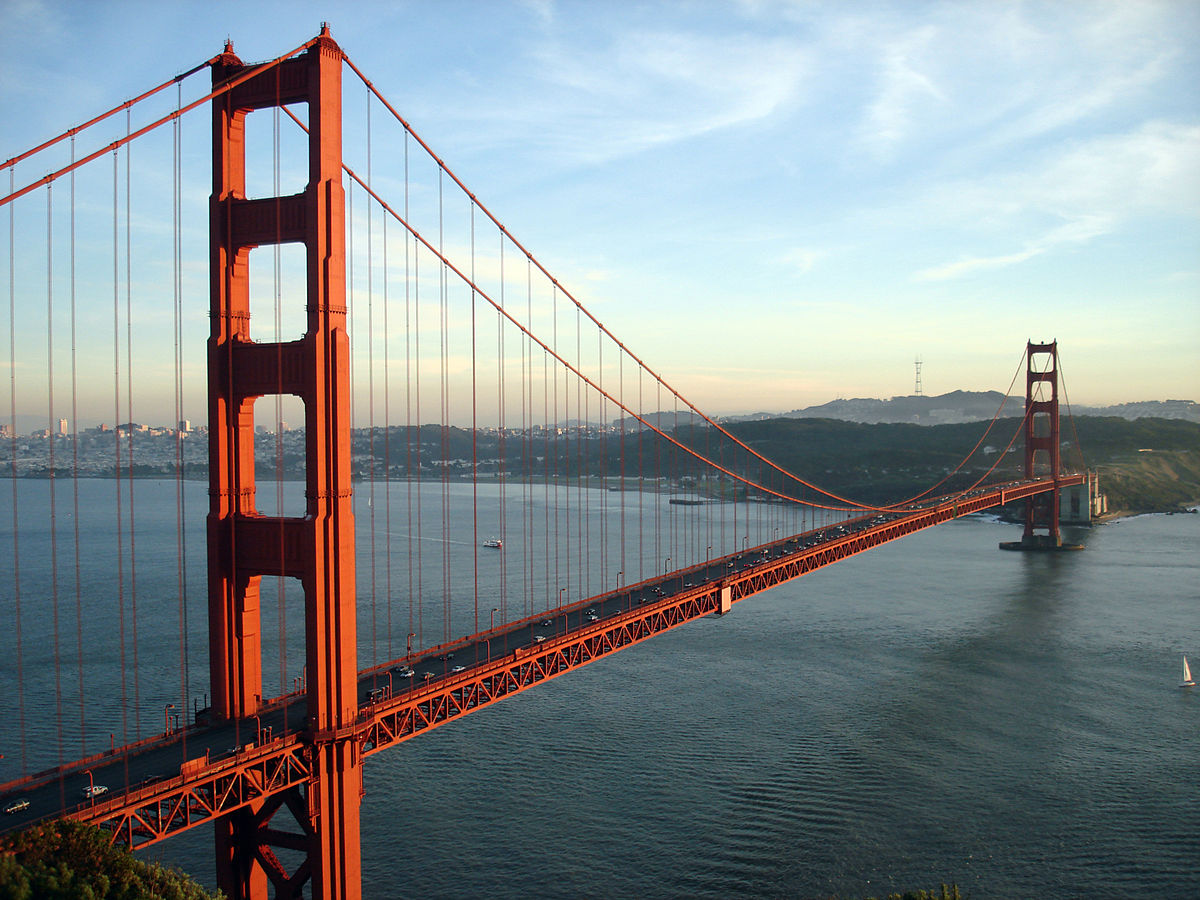

In [24]:
ns(filename='C:\\Users\\sushe\\Desktop\\golden.jpg') 

In [25]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.

suggest_locations('C:\\Users\\sushe\\Desktop\\golden.jpg')

Is this an image of  Golden_Gate_Bridge ,  Forth_Bridge ,   or Brooklyn_Bridge ?


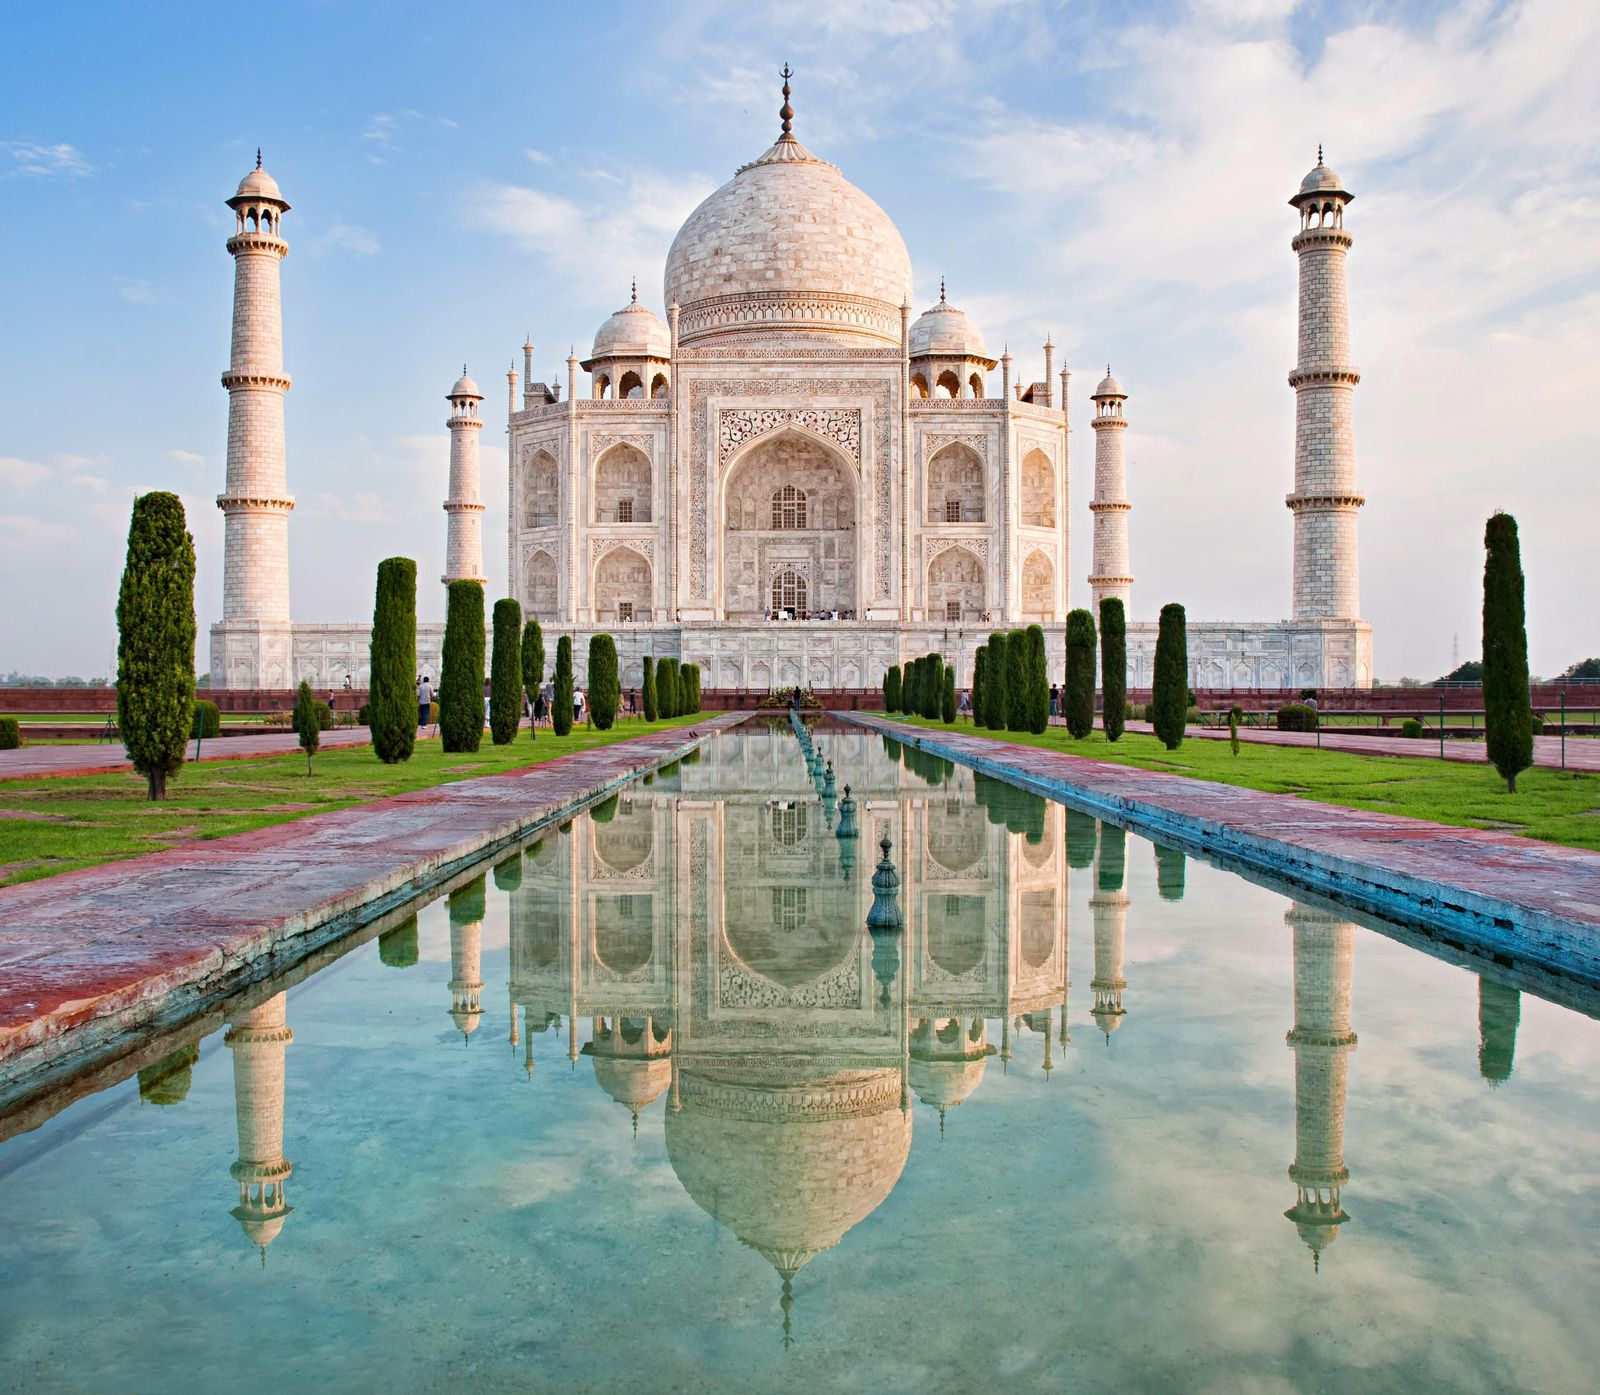

In [26]:
ns(filename='C:\\Users\\sushe\\Desktop\\terminal.jpg') 

In [13]:
suggest_locations('C:\\Users\\sushe\\Desktop\\termina;.jpg')

NameError: name 'suggest_locations' is not defined

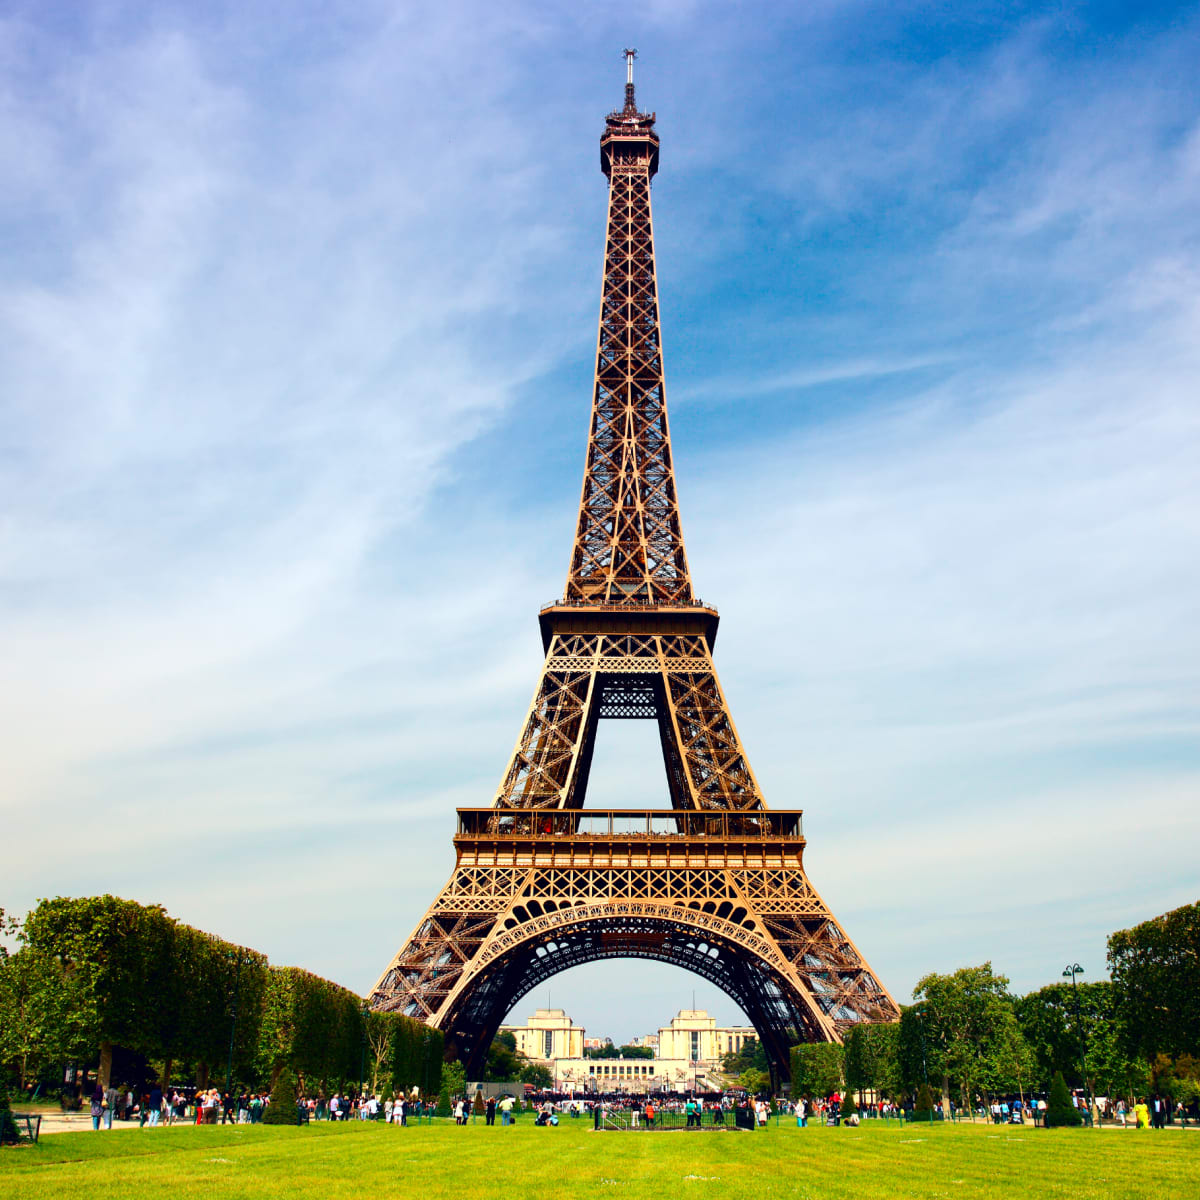

In [28]:
ns(filename='C:\\Users\\sushe\\Desktop\\eiffel.jpg') 

In [29]:
suggest_locations('C:\\Users\\sushe\\Desktop\\eiffel.jpg')

Is this an image of  Eiffel_Tower ,  Forth_Bridge ,   or Sydney_Harbour_Bridge ?


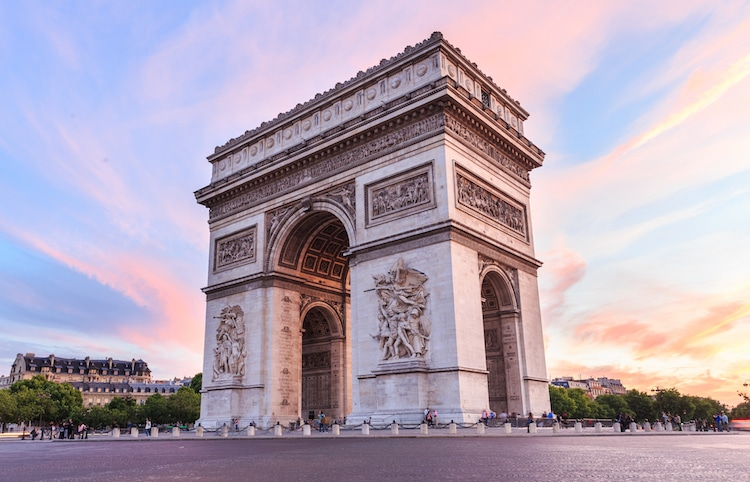

In [30]:
ns(filename='C:\\Users\\sushe\\Desktop\\arc.jpg') 

In [31]:
suggest_locations('C:\\Users\\sushe\\Desktop\\arc.jpg')

Is this an image of  Temple_of_Olympian_Zeus ,  Gateway_of_India ,   or Trevi_Fountain ?
